In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from queue import Queue

def create_maze(dim):
    if dim % 2 == 0:
        dim += 1
    # Create a grid filled with walls
    maze = np.ones((dim, dim))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < (dim-1)/2 and ny < (dim-1)/2 and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

# plotting functions
def plot(maze):
    # add 0.5 so that the state is plotted in the middle of the grid square

    plt.figure(figsize=(5,5))
    plt.imshow(maze.T, origin="lower", cmap='gray') # plot the occupancy map
    plt.axis('off')
    plt.show()

21


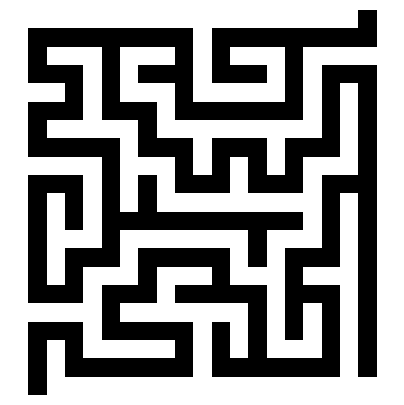

In [2]:
maze = create_maze(20)
print(len(maze))
plot(maze)